<a href="https://colab.research.google.com/github/ShounakD1991/UDEMY_MACHINE_LEARNING_A-Z_HANDS_ON_PYTHON_IN_DATA_SCIENCE/blob/main/Multiple_Linear_Regression_15_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
## Multiple Linear Regression
---







---
### Importing the libraries
---





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



---
### Importing the Dataset
---





In [2]:
df=pd.read_csv("/content/drive/MyDrive/PGDSE_STUDY_MATERIAL/Udemy Courses/Machine Learning A-Z Hands-On Python & R In Data Science/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values



---
### Encoding Categorical Data
---







---
#### Encode the Independent Variable
---





In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [5]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3



---
### Splitting the dataset into Training and Test Set
---





In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)



---
### Training the Multiple Linear Regression model on the Training set
---





In [7]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)



---
### Predicting the Test set results
---





In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[111616.64 103282.38]
 [132709.39 144259.4 ]
 [140155.11 146121.95]
 [ 76099.2   77798.83]
 [186329.94 191050.39]
 [112822.2  105008.31]
 [ 63002.    81229.06]
 [ 99107.1   97483.56]
 [119287.75 110352.25]
 [175522.84 166187.94]
 [101000.7   96778.92]
 [ 85772.99  96479.51]
 [117713.76 105733.54]
 [ 90230.88  96712.8 ]
 [133375.04 124266.9 ]
 [167530.55 155752.6 ]
 [158013.55 132602.65]]




---
### Forward Selection Technique
---





In [9]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
linreg_forward = sfs(estimator = regressor, k_features = 'best', forward = True, verbose = 2, scoring = 'r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-02-15 04:28:42] Features: 1/6 -- score: 0.9120226120449269[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-02-15 04:28:42] Features

In [10]:
print('Features selelected using forward selection are: \n',sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
 ('3', '4', '5')

R-squared:  0.9225492372419145




---
### Backward Elimination Technique
---





In [11]:
linreg_backward = sfs(estimator = regressor, k_features = 'best', forward = False, verbose = 2, scoring = 'r2')

# fit the forward selection on training data using fit()
sfs_backward = linreg_backward.fit(np.array(X_train), np.array(y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-02-15 04:28:42] Features: 5/1 -- score: 0.9181154669678586[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-02-15 04:28:42] Features: 4/1 -- score: 0.9181154669684115[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2021-02-15 04:28:42] Features: 3/1 -- score: 0.9202996625844495[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [12]:
print('Features selelected using Backward Elimination are: \n',sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-squared: ', sfs_backward.k_score_)

Features selelected using Backward Elimination are: 
 ('3', '5')

R-squared:  0.9215304827985694




---
### Multiple Linear Regression Model Using OLS
---







---
#### Making a copy of original dataset
---





In [13]:
df1=df.copy()



---
### Encode the categorical data
---







---
#### Encode the Independent Variable
---





In [14]:
df1=pd.get_dummies(data=df1,columns=['State'],drop_first=True)
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0




---
### Model Formation Using OLS method
---





In [15]:
import statsmodels.api as sm
x=df1.drop("Profit",axis=1)
y=df1['Profit']
Xc=sm.add_constant(x)
model=sm.OLS(y,Xc).fit()
y_hat=model.predict(Xc)
print(model.summary())
SSE=np.sum((y-y_hat)**2)
SST=np.sum((y-np.mean(y))**2)
SSR=np.sum((y_hat-np.mean(y))**2)
MSR=np.sum((y_hat-np.mean(y))**2)/(df.columns.value_counts().sum()-1) # deducting the degrees of freedom
MSE=np.sum((y-y_hat)**2)/(len(df)-df.columns.value_counts().sum())
print(f"\n\nSSR={SSR:0.2f},SSE={SSE:0.2f},SST={SST:0.2f}\n\nR_Squared={(SSR/SST):0.2f}\n\nMSR={MSR:0.2f},MSE={MSE:0.2f}\n\nF_Stat={(MSR/MSE):0.2f}")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           1.34e-27
Time:                        04:28:42   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.013e+04   6884.820     



---
### Checking the multicollinearity in data
---





In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print("The Multicollinearity for the independent variable\n")
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))] 
print(vif_data)

The Multicollinearity for the independent variable

           feature       VIF
0        R&D Spend  8.451019
1   Administration  4.950277
2  Marketing Spend  8.092278
3    State_Florida  2.004519
4   State_New York  1.928836




---
### Checking the normality in residual
---







---
#### Checking the normality in residual using KDE Plot
---





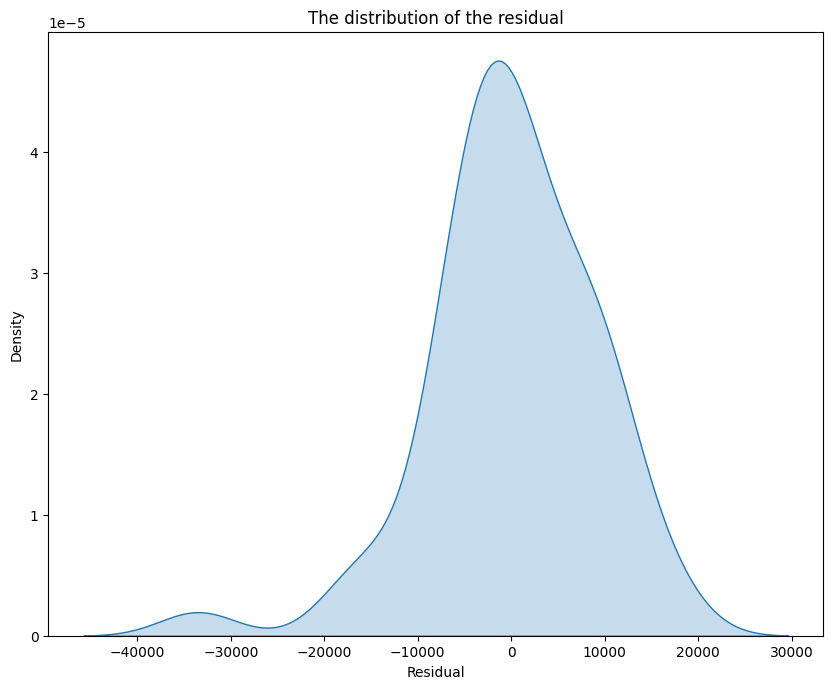

The Residual do not follow the normal distribution but left skewed in above KDE plot


In [19]:
residual=model.resid
residual=pd.Series(data=residual,name="Residual")
plt.figure(figsize=(10,8),dpi=100)
sns.kdeplot(residual,shade=True)
plt.xlabel("Residual")
plt.ylabel("Density")
plt.title("The distribution of the residual")
plt.show()
print("The Residual follow the normal distribution in above KDE plot")



---
#### Checking the normality in residual using QQ Plot
---





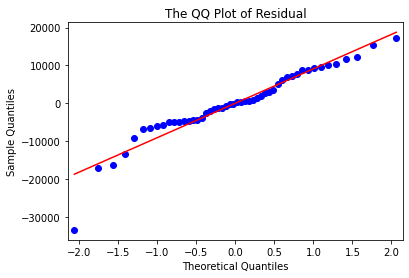

The Residual do not follow the normal distribution in the above QQ Plot


In [20]:
sm.qqplot(residual, line ='r')
plt.title("The QQ Plot of Residual")
plt.show()
print("The Residual follows the normal distribution in the above QQ Plot")

---
#### Checking the normality in residual using Shapiro Test
---

In [23]:
from scipy.stats import shapiro
print(f"The Shapiro test result is P_Value={shapiro(residual)[1]} is <5% and hence the residual are normally distributed")

The Shapiro test result is P_Value=0.010546913370490074 is <5% and hence the residual are normally distributed
